In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
from IPython.display import display
pd.options.display.max_columns = None

In [3]:
df_clics= pd.read_csv("../data/colex/colex_clics3_glottolog.csv")

## language information from Glottolog

In [5]:
file = "../data/americas/americas_languages.csv"
df_langs_america = pd.read_csv(file)

In [8]:
df_langs_america[df_langs_america["Name"].str.contains("Artificial", na=False)]

,Glottocode,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment


In [9]:
df_langs_america[df_langs_america["Name"].str.contains("Creole", na=False)]

,Glottocode,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment


In [10]:
df_langs_america[df_langs_america["Name"].str.contains("Pidgin", na=False)]

,Glottocode,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment


In [117]:
df_langs_america[df_langs_america["Top-level family"].str.contains("Indo", na=False)]

,Glottocode,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment


In [11]:
df_langs_america[df_langs_america["Name"]=="Lengua"]

,Glottocode,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment


In [154]:
import os
os.getcwd()

'/Users/yiyichen/Documents/experiments/ColexPhon/notebooks'

In [13]:
df_clics_america= df_clics[df_clics["Glottocode"].isin(df_langs_america["Glottocode"])]

In [15]:
df_clics_america.to_csv("../data/americas/colex_clics3_america.csv", index=False)

In [16]:
len(df_clics_america)

14501

In [19]:
df = df_clics_america

# Correlations
## the concepts closer in concretness are more probable to colexify

In [4]:
df = pd.read_csv("../data/americas/colex_clics3_america.csv")

In [5]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
import json
from collections import Counter, defaultdict

from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [6]:
import scipy.stats

In [7]:
df

,Form_ID_x,Form_ID_y,Concepticon_ID_x,Concepticon_ID_y,Value,Form,Concept_x,Concept_y,Conc.M.x,Conc.M.y,Conc.SD.x,Conc.SD.y,Glottocode,diff,ISO639P3code,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment,ConcDist,COLEX
0,260-1-212-1,260-1-214-1,1228,640,mukadi,mukadi,earth (soil),mud,4.80,4.86,0.55,0.44,yagu1244,True,yad,Yagua,Peba-Yagua,South America,-3.429130,-72.218600,"AES(ordinal=3, id='definite', name='shifting',...",0.06,earth (soil)~mud
1,Barasana-72_earth-1,Barasana-364_dust-2,1228,2,sitá,sitá,earth (soil),dust,4.80,4.40,0.55,0.87,bara1380,True,bsn,Barasana-Eduria,Tucanoan,South America,0.021930,-70.808000,"AES(ordinal=3, id='definite', name='shifting',...",0.40,earth (soil)~dust
2,Koreguaje-72_earth-1,Koreguaje-364_dust-1,1228,2,ʤaʔo,ʤaʔo,earth (soil),dust,4.80,4.40,0.55,0.87,kore1283,True,coe,Koreguaje,Tucanoan,South America,0.923160,-75.347500,"AES(ordinal=3, id='definite', name='shifting',...",0.40,earth (soil)~dust
3,Siona-72_earth-1,Siona-364_dust-1,1228,2,jaʔo,jaʔo,earth (soil),dust,4.80,4.40,0.55,0.87,sion1247,True,snn,Siona-Tetete,Tucanoan,South America,0.317330,-76.023700,"AES(ordinal=3, id='definite', name='shifting',...",0.40,earth (soil)~dust
4,Wayuu-72_earth-1,Wayuu-364_dust-1,1228,2,má,má,earth (soil),dust,4.80,4.40,0.55,0.87,wayu1243,True,guc,Wayuu,Arawakan,South America,11.395566,-72.199791,"AES(ordinal=2, id='vulnerable', name='threaten...",0.40,earth (soil)~dust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14496,Wichi-1331_thegovernment-1,Wichi-1332_thepresident-1,815,899,niyat,niyat,government,president,2.88,4.40,1.39,0.97,wich1264,True,mzh,Wichí Lhamtés Güisnay,Matacoan,South America,-23.163300,-62.175700,"AES(ordinal=2, id='vulnerable', name='threaten...",1.52,government~president
14497,ImbaburaQuechua-1456_dead-1,ImbaburaQuechua-1443_thecarcass-1,1770,1625,wañushka,wañushka,carcass,dead,4.46,4.07,1.17,1.27,imba1240,True,qvi,Imbabura Highland Quichua,Quechuan,South America,0.317760,-78.372900,"AES(ordinal=2, id='vulnerable', name='threaten...",0.39,carcass~dead
14498,Otomi-1456_dead-1,Otomi-1443_thecarcass-1,1770,1625,animä,animä,carcass,dead,4.46,4.07,1.17,1.27,mezq1235,True,ote,Mezquital Otomi,Otomanguean,North America,20.227400,-99.556400,"AES(ordinal=1, id='safe', name='not endangered...",0.39,carcass~dead
14499,Otomi-1456_dead-2,Otomi-1443_thecarcass-2,1770,1625,ndu,ndu,carcass,dead,4.46,4.07,1.17,1.27,mezq1235,True,ote,Mezquital Otomi,Otomanguean,North America,20.227400,-99.556400,"AES(ordinal=1, id='safe', name='not endangered...",0.39,carcass~dead


In [8]:
df["COLEX"].value_counts().to_dict()

{'moon~month': 66,
 'path~path or road': 63,
 'knife~knife (for eating)': 62,
 'grandson~granddaughter': 58,
 'tree~wood': 57,
 'belly~stomach': 56,
 'son-in-law (of man)~son-in-law (of woman)': 53,
 'daughter-in-law (of man)~daughter-in-law (of woman)': 50,
 'female (of person)~female (of animal)': 48,
 'meat~flesh': 48,
 'male (of person)~male (of animal)': 47,
 'earth (soil)~land': 47,
 'female (of person)~woman': 45,
 'baby~child (young human)': 45,
 'male (of person)~man': 45,
 'claw~fingernail': 45,
 'language~word': 45,
 'lagoon~lake': 44,
 'go up (ascend)~climb': 44,
 'hear~listen': 44,
 'sea~ocean': 44,
 'weave~braid (verb) or weave (basket)': 44,
 'road~path': 44,
 'mother-in-law (of man)~mother-in-law (of woman)': 43,
 'old~old man': 43,
 'skin~leather': 43,
 'father-in-law (of man)~father-in-law (of woman)': 42,
 'how much~how many pieces': 41,
 'sky~heaven': 41,
 'blue~green': 41,
 'nape (of neck)~neck': 40,
 'now~today': 39,
 'high~tall': 39,
 'long~tall': 39,
 'plate~dis

In [11]:
df[df["Concept_y"]=="sun"]

,Form_ID_x,Form_ID_y,Concepticon_ID_x,Concepticon_ID_y,Value,Form,Concept_x,Concept_y,Conc.M.x,Conc.M.y,Conc.SD.x,Conc.SD.y,Glottocode,diff,ISO639P3code,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment,ConcDist,COLEX
419,174-1-520-1,174-1-610-1,630,1343,šī,šī,light (radiation),sun,4.21,4.83,1.15,0.6,maqu1238,True,mch,Ye'kwana,Cariban,South America,4.707050,-64.387700,"AES(ordinal=3, id='definite', name='shifting',...",0.62,light (radiation)~sun
420,294-1-520-2,294-1-610-3,630,1343,rãrĩr,rãrĩr,light (radiation),sun,4.21,4.83,1.15,0.6,kain1272,True,kgp,Kaingang,Nuclear-Macro-Je,South America,-27.767100,-52.539400,"AES(ordinal=2, id='vulnerable', name='threaten...",0.62,light (radiation)~sun
421,294-1-520-3,294-1-610-2,630,1343,rɛ̃rĩr,rɛ̃rĩr,light (radiation),sun,4.21,4.83,1.15,0.6,kain1272,True,kgp,Kaingang,Nuclear-Macro-Je,South America,-27.767100,-52.539400,"AES(ordinal=2, id='vulnerable', name='threaten...",0.62,light (radiation)~sun
422,Wichi-40_thesun-1,Wichi-48_thelight-1,630,1343,fwala,fwala,light (radiation),sun,4.21,4.83,1.15,0.6,wich1264,True,mzh,Wichí Lhamtés Güisnay,Matacoan,South America,-23.163300,-62.175700,"AES(ordinal=2, id='vulnerable', name='threaten...",0.62,light (radiation)~sun
423,ZinacantanTzotzil-40_thesun-1,ZinacantanTzotzil-48_thelight-1,630,1343,k'ak'al,k'ak'al,light (radiation),sun,4.21,4.83,1.15,0.6,tzot1259,True,tzz,Tzotzil,Mayan,North America,16.636200,-92.738800,"AES(ordinal=1, id='safe', name='not endangered...",0.62,light (radiation)~sun
2735,294-1-520-1,294-12-430-2,1942,1343,rã,rã,near,sun,2.79,4.83,1.40,0.6,kain1272,True,kgp,Kaingang,Nuclear-Macro-Je,South America,-27.767100,-52.539400,"AES(ordinal=2, id='vulnerable', name='threaten...",2.04,near~sun
3913,33900-120_sun-1,33900-210_hour-1,1353,1343,giti,giti,hour,sun,3.10,4.83,1.42,0.6,kuik1246,True,kui,Kuikúro-Kalapálo,Cariban,South America,-12.303500,-53.226100,"AES(ordinal=3, id='definite', name='shifting',...",1.73,hour~sun
3914,60800-120_sun-1,60800-210_hour-1,1353,1343,gad,gad,hour,sun,3.10,4.83,1.42,0.6,suru1262,True,sru,Suruí,Tupian,South America,-11.098900,-61.281800,"AES(ordinal=3, id='definite', name='shifting',...",1.73,hour~sun
3915,65500-120_sun-1,65500-210_hour-1,1353,1343,kwat,kwat,hour,sun,3.10,4.83,1.42,0.6,kama1373,True,kay,Kamayurá,Tupian,South America,-12.266100,-53.465100,"AES(ordinal=3, id='definite', name='shifting',...",1.73,hour~sun
3924,100-211_watchclock-1,100-120_sun-1,1323,1343,ya,ya,clock,sun,5.00,4.83,0.00,0.6,aika1237,True,tba,Aikanã,NaN,South America,-12.669500,-60.535300,"AES(ordinal=2, id='vulnerable', name='threaten...",0.17,clock~sun


In [13]:
df[df["Concept_x"]=="sun"]

,Form_ID_x,Form_ID_y,Concepticon_ID_x,Concepticon_ID_y,Value,Form,Concept_x,Concept_y,Conc.M.x,Conc.M.y,Conc.SD.x,Conc.SD.y,Glottocode,diff,ISO639P3code,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment,ConcDist,COLEX
10414,Bari-67_day-1,Bari-64_sun-1,1343,1225,jããnə,jããnə,sun,day (not night),4.83,NaN,0.6,NaN,bari1297,True,mot,Barí,Chibchan,South America,9.084970,-72.935300,"AES(ordinal=2, id='vulnerable', name='threaten...",NaN,sun~day (not night)
10415,Kogui-67_day-1,Kogui-64_sun-2,1343,1225,niṹwi,niṹwi,sun,day (not night),4.83,NaN,0.6,NaN,cogu1240,True,kog,Cogui,Chibchan,South America,10.948500,-73.804300,"AES(ordinal=3, id='definite', name='shifting',...",NaN,sun~day (not night)
10416,Piapoco-67_day-1,Piapoco-64_sun-1,1343,1225,èeri,èeri,sun,day (not night),4.83,NaN,0.6,NaN,piap1246,True,pio,Piapoco,Arawakan,South America,4.377180,-68.595300,"AES(ordinal=3, id='definite', name='shifting',...",NaN,sun~day (not night)
10417,Wayuu-67_day-1,Wayuu-64_sun-1,1343,1225,kaʔí,kaʔí,sun,day (not night),4.83,NaN,0.6,NaN,wayu1243,True,guc,Wayuu,Arawakan,South America,11.395566,-72.199791,"AES(ordinal=2, id='vulnerable', name='threaten...",NaN,sun~day (not night)
10418,173-14-410-1,173-1-520-1,1343,1225,wei,wei,sun,day (not night),4.83,NaN,0.6,NaN,macu1259,True,mbc,Macushi,Cariban,South America,4.318610,-60.220900,"AES(ordinal=3, id='definite', name='shifting',...",NaN,sun~day (not night)
10419,222-14-410-1,222-1-520-1,1343,1225,tona-l,tona-l,sun,day (not night),4.83,NaN,0.6,NaN,high1278,True,azz,Highland Puebla Nahuatl,Uto-Aztecan,North America,20.155400,-97.555600,"AES(ordinal=1, id='safe', name='not endangered...",NaN,sun~day (not night)
10420,225-14-410-1,225-1-520-1,1343,1225,šāʔ,šāʔ,sun,day (not night),4.83,NaN,0.6,NaN,seri1257,True,sei,Seri,NaN,North America,28.987700,-112.384000,"AES(ordinal=3, id='definite', name='shifting',...",NaN,sun~day (not night)
10421,243-14-410-1,243-1-520-1,1343,1225,sua,sua,sun,day (not night),4.83,NaN,0.6,NaN,chib1270,True,chb,Chibcha,Chibchan,South America,6.249990,-74.166600,"AES(ordinal=6, id='extinct', name='extinct', e...",NaN,sun~day (not night)
10422,261-14-410-1,261-1-520-1,1343,1225,se-s,se-s,sun,day (not night),4.83,NaN,0.6,NaN,baur1253,True,brg,Baure,Arawakan,South America,-13.610000,-63.680000,"AES(ordinal=5, id='critical', name='nearly ext...",NaN,sun~day (not night)
10423,262-14-410-1,262-1-520-1,1343,1225,kaʔi,kaʔi,sun,day (not night),4.83,NaN,0.6,NaN,wayu1243,True,guc,Wayuu,Arawakan,South America,11.395566,-72.199791,"AES(ordinal=2, id='vulnerable', name='threaten...",NaN,sun~day (not night)


### 1. only colexifications and conconcreteness distance

In [21]:
colex_condist = dict(zip(df["COLEX"],df["ConcDist"]))

In [22]:
df_colex_concdist = pd.DataFrame.from_dict(colex_condist, orient="index").dropna()

In [135]:
df_colex_concdist.rename(columns={0:"Concreteness Distance"}, inplace=True)

In [137]:
df_colex_concdist

,ConcDist,COLEX
earth (soil)~mud,0.06,earth (soil)~mud
earth (soil)~dust,0.40,earth (soil)~dust
earth (soil)~sand,0.20,earth (soil)~sand
earth (soil)~dirty,0.57,earth (soil)~dirty
earth (soil)~field,0.54,earth (soil)~field
...,...,...
backward~back (direction),0.92,backward~back (direction)
zero~nothing,0.65,zero~nothing
machine~motor,0.59,machine~motor
government~president,1.52,government~president


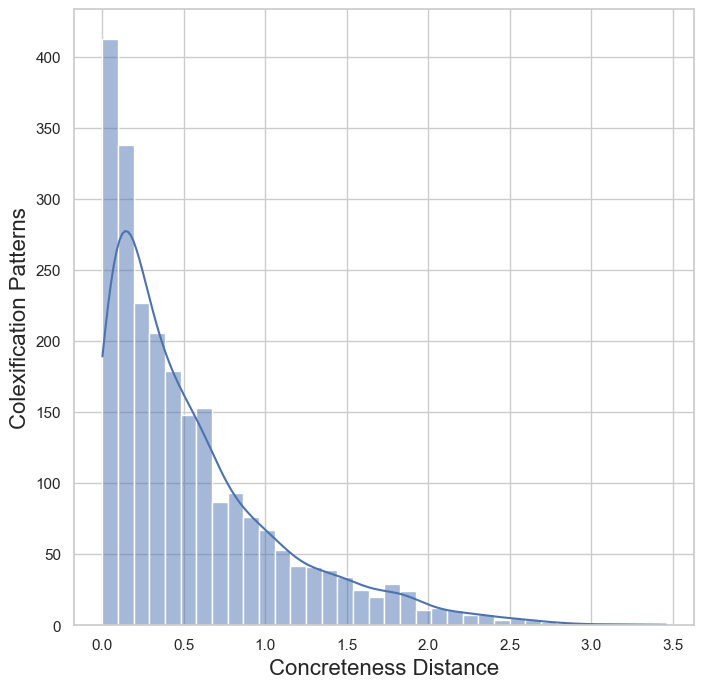

In [158]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style("whitegrid")

b= sns.histplot(data=df_colex_concdist, x="ConcDist", kde=True)
b.set_xlabel("Concreteness Distance", fontsize=16)
b.set_ylabel("Colexification Patterns", fontsize=16)
fig = b.get_figure()
fig.savefig("../data/images/america_concdist_colex_patterns.png")

In [126]:
df_colex_concdist.to_csv("../data/americas/dist_all_americas.csv")

In [41]:
df_colex_concdist.head()

,ConcDist,COLEX
earth (soil)~mud,0.06,earth (soil)~mud
earth (soil)~dust,0.40,earth (soil)~dust
earth (soil)~sand,0.20,earth (soil)~sand
earth (soil)~dirty,0.57,earth (soil)~dirty
earth (soil)~field,0.54,earth (soil)~field


In [51]:
df_colex_concdist["COLEX"]=df_colex_concdist.index
X_df = pd.DataFrame.from_dict(df_colex_concdist.groupby("ConcDist").agg("count")["COLEX"].to_dict(), orient="index").rename(columns={0:"#COLEX"})
X_df["ConcDist"]=X_df.index

In [ ]:
def plots_linear(X,Y, slope, intercept, r, p, stderr,line):
    fig, ax = plt.subplots()
    ax.plot(X,Y, linewidth=0, marker='s', label='')
    ax.plot(X, intercept + slope * X, label=line)
    ax.set_xlabel('Concretness Distance')
    ax.set_ylabel('#Colexification')
    ax.legend(facecolor='white')
    plt.show()

In [132]:
def correlation(X_df):
    X = X_df.index.values
    print(X.shape)
    Y = X_df["#COLEX"].values
    print(Y.shape)
    pearsonr = scipy.stats.pearsonr(X,Y)
    print("correlation:", pearsonr)
    
    sns.lmplot(x="ConcDist", y="#COLEX", data=X_df, lowess=True, line_kws={"color":"red"})
    
#     slope, intercept, r, p, stderr = scipy.stats.linregress(X,Y)
#     line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
#     plots_linear(X,Y, slope, intercept, r, p, stderr,line)

(593,)
(593,)
correlation: PearsonRResult(statistic=-0.38289373689139944, pvalue=3.829838968909062e-22)


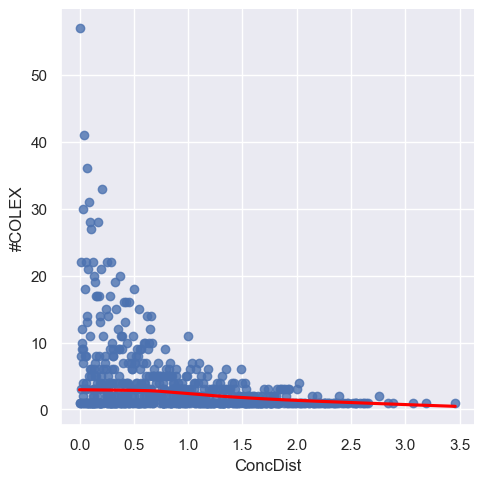

In [133]:
correlation(X_df)

### 2. all colexifications (including different forms) and their concreteness

In [26]:
len(df), len(df.drop_duplicates(["COLEX", "Glottocode"]))

(14501, 13681)

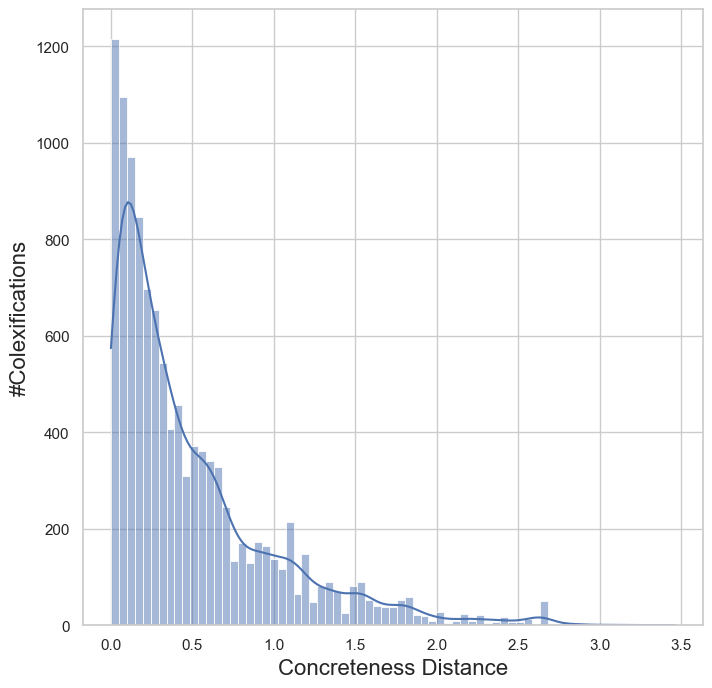

In [157]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style("whitegrid")

b= sns.histplot(data=df, x="ConcDist", kde=True)
b.set_xlabel("Concreteness Distance", fontsize=16)
b.set_ylabel("#Colexifications", fontsize=16)
fig = b.get_figure()
fig.savefig("../data/images/america_concdist_all_colex.png")

In [ ]:
sns.histplot

In [118]:
X_all

,#COLEX,ConcDist
0.000000,326,0.000000
0.005000,9,0.005000
0.006667,7,0.006667
0.010000,89,0.010000
0.010000,9,0.010000
...,...,...
2.840000,4,2.840000
2.890000,3,2.890000
3.070000,3,3.070000
3.190000,1,3.190000


In [91]:
X_all = pd.DataFrame.from_dict(df.groupby("ConcDist").agg("count")["COLEX"].to_dict(), orient="index").rename(columns={0:"#COLEX"})
X_all["ConcDist"]=X_all.index

(593,)
(593,)
correlation: PearsonRResult(statistic=-0.35851007188277406, pvalue=2.0012613307610744e-19)


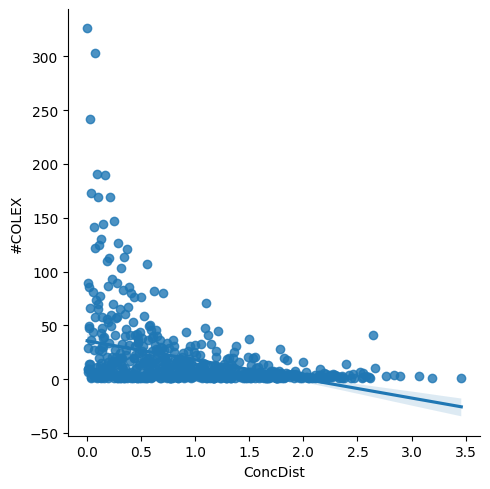

In [93]:
correlation(X_all)

### 3. count colexification by languages and their concreteness

In [29]:

colex_lang_counter = defaultdict(dict)
for lang, colex in zip(df["Glottocode"], df["COLEX"]):
    if colex not in colex_lang_counter:
        colex_lang_counter[colex]=defaultdict(int)
    
    colex_lang_counter[colex][lang]+=1
    

In [30]:
langs_len = len(list(set(df["Glottocode"])))

In [31]:
langs_len

170

In [32]:
colex_langs = {k:len(v) for k,v in colex_lang_counter.items()}

In [34]:
df_colex_lang= pd.DataFrame.from_dict(colex_langs, orient="index")
df_colex_lang.columns = ["langs"]
df_colex_lang["COLEX"] = df_colex_lang.index
df_colex_lang["ConcDist"] = df_colex_lang["COLEX"].parallel_apply(lambda x: colex_condist[x])

In [35]:
df_colex_lang

,langs,COLEX,ConcDist
earth (soil)~mud,1,earth (soil)~mud,0.06
earth (soil)~dust,9,earth (soil)~dust,0.40
earth (soil)~sand,9,earth (soil)~sand,0.20
earth (soil)~dirty,1,earth (soil)~dirty,0.57
earth (soil)~field,1,earth (soil)~field,0.54
...,...,...,...
zero~nothing,1,zero~nothing,0.65
parents-in-law~child-in-law,1,parents-in-law~child-in-law,NaN
machine~motor,1,machine~motor,0.59
government~president,3,government~president,1.52


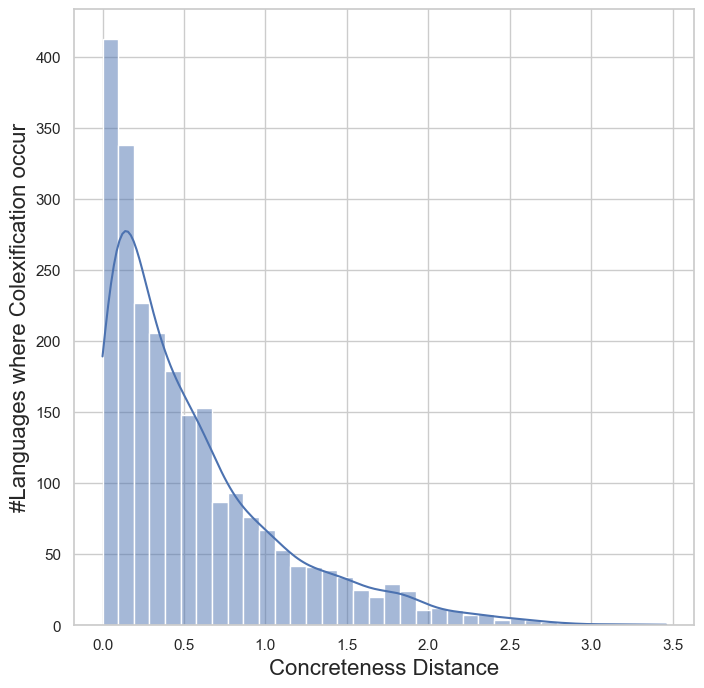

In [160]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style("whitegrid")

b= sns.histplot(data=df_colex_lang, x="ConcDist", kde=True)
b.set_xlabel("Concreteness Distance", fontsize=16)
b.set_ylabel("#Languages where Colexification occur", fontsize=16)
fig = b.get_figure()
fig.savefig("../data/images/america_concdist_langs_colex.png")

<Axes: xlabel='ConcDist', ylabel='Count'>

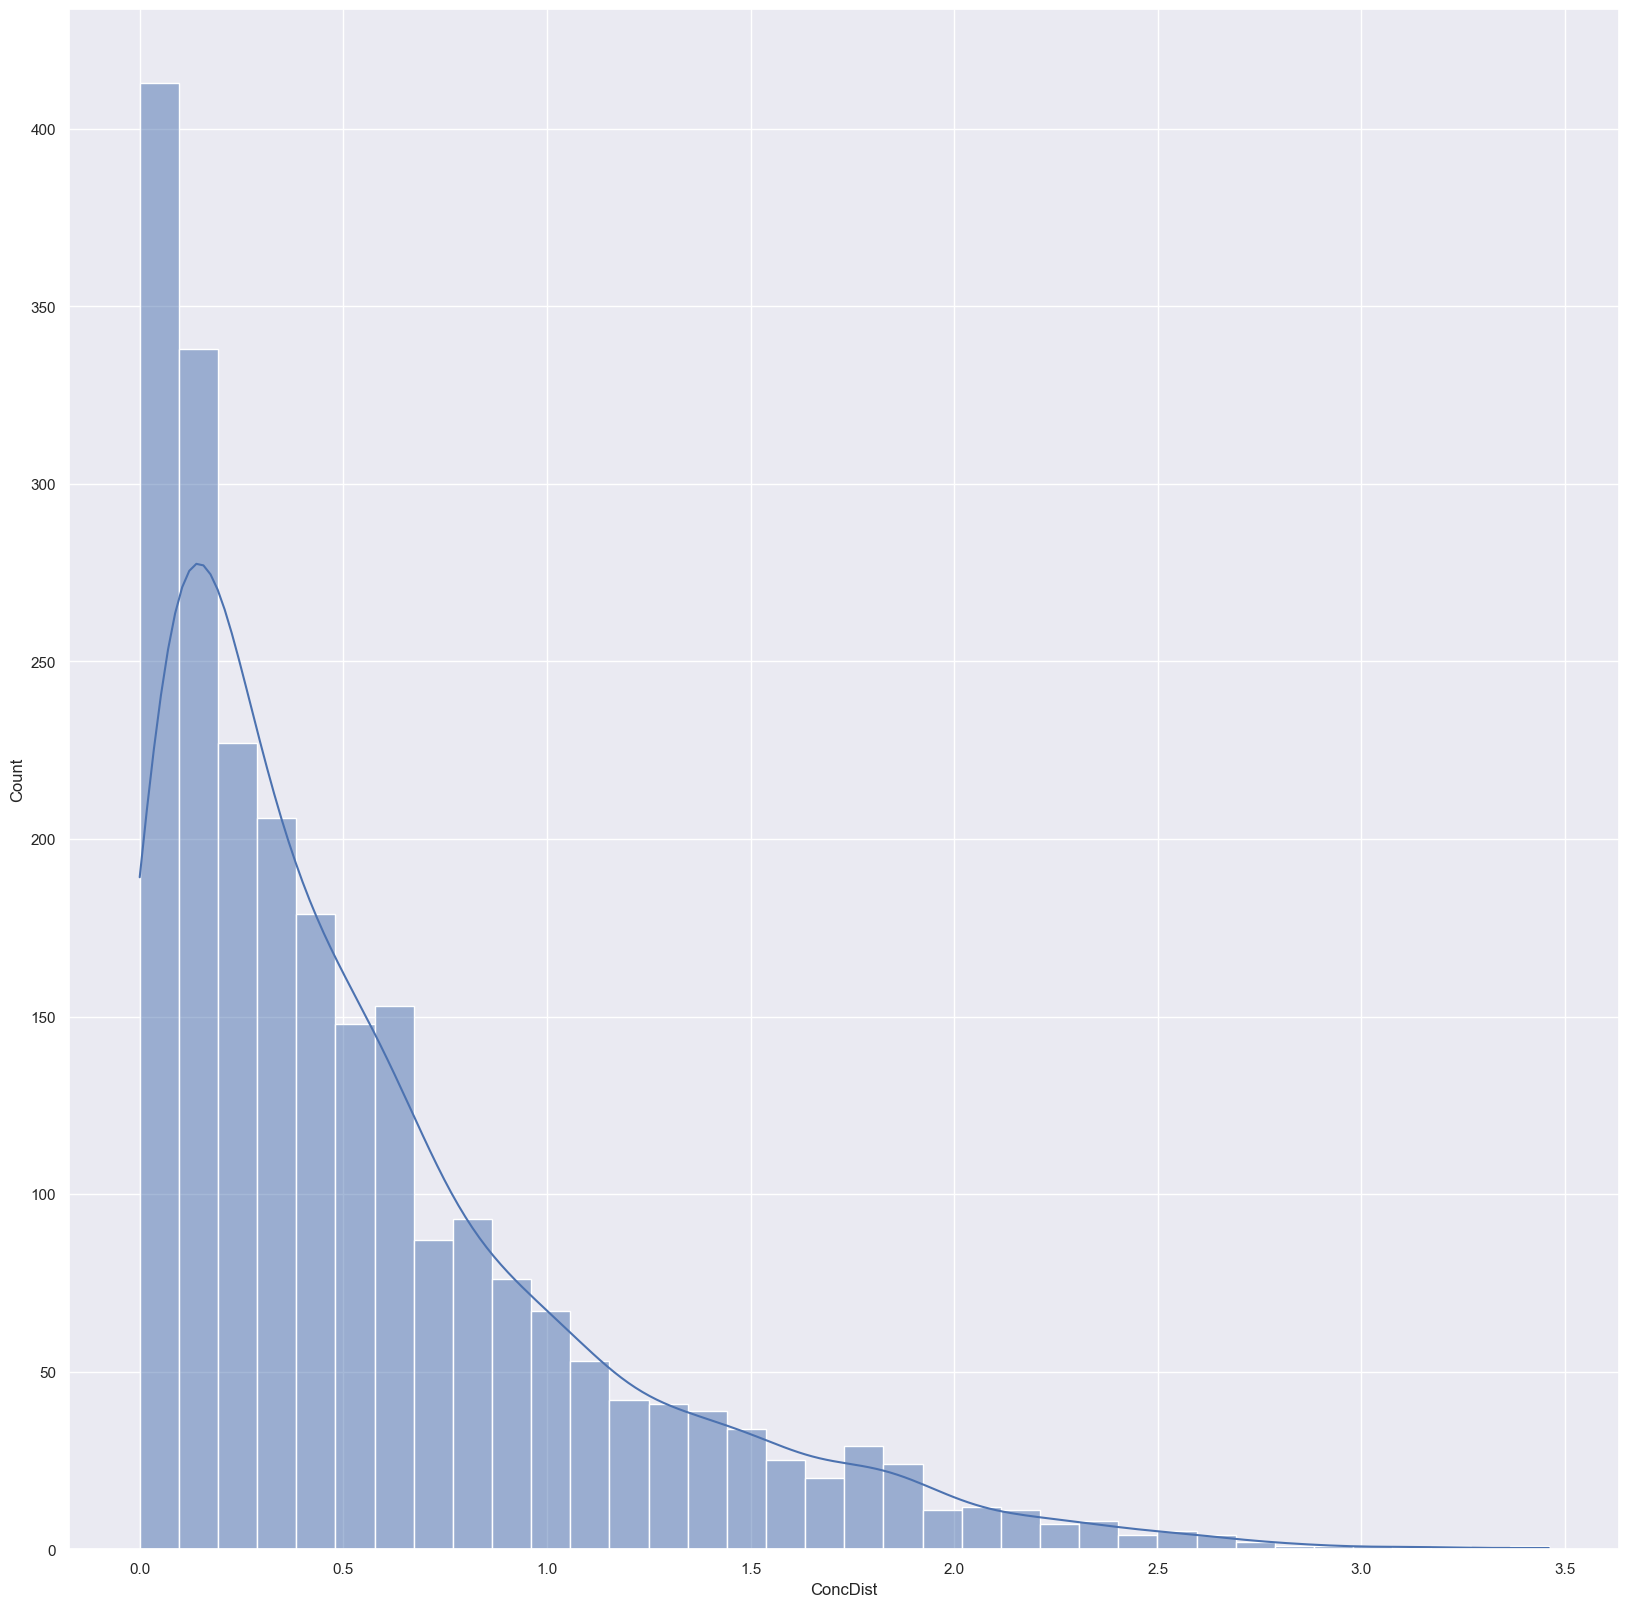

In [123]:
sns.histplot(data= df_colex_lang, x="ConcDist", kde=True)

In [98]:
X_langs = pd.DataFrame.from_dict(df_colex_lang.groupby("ConcDist")["langs"].agg("sum").to_dict(), orient="index").rename(columns={0:"#LANGS"})
X_langs["ConcDist"]=X_langs.index

In [99]:
X_langs

,#LANGS,ConcDist
0.000000,302,0.000000
0.005000,9,0.005000
0.006667,7,0.006667
0.010000,87,0.010000
0.010000,9,0.010000
...,...,...
2.840000,4,2.840000
2.890000,3,2.890000
3.070000,3,3.070000
3.190000,1,3.190000


In [115]:
def correlation(X_df):
    sns.set(rc={'figure.figsize':(20,20)})
    X = X_df.index.values
    print(X.shape)
    Y = X_df["#LANGS"].values
    print(Y.shape)
    pearsonr = scipy.stats.pearsonr(X,Y)
    print("correlation:", pearsonr)
    
    sns.lmplot(x="ConcDist", y="#LANGS", data=X_df, line_kws={"color":"pink"})
    
#     slope, intercept, r, p, stderr = scipy.stats.linregress(X,Y)
#     line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
#     plots_linear(X,Y, slope, intercept, r, p, stderr,line)

(593,)
(593,)
correlation: PearsonRResult(statistic=-0.360320757953079, pvalue=1.280426396220126e-19)


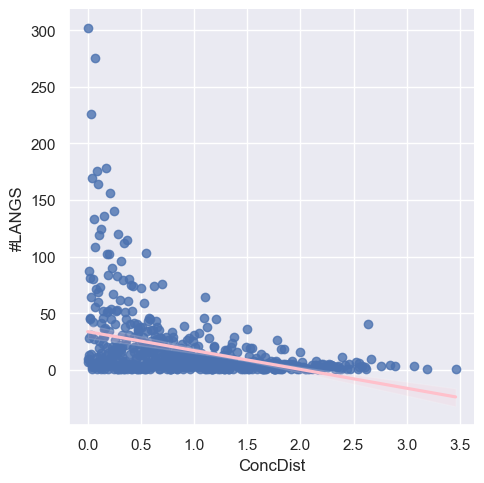

In [116]:
correlation(X_langs)

In [ ]:
X_df["ConcDist"]=X_df.index